<a href="https://colab.research.google.com/github/danielhazann/RL_project/blob/main/LunarLanderContinuous/LunarLanderContinuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcment Learning Project**
## *Part 2 - LunarLanderContinuous-v2 - Actor Critic*
#### Daniel Hazan (209718824)
#### Chloe Benmussa (802585)


---
















## Clone Github Repository
[https://github.com/danielhazann/RL_project](https://github.com/danielhazann/RL_project)



In [1]:
!git clone https://github.com/danielhazann/RL_project.git

Cloning into 'RL_project'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 37 (delta 13), reused 18 (delta 8), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [2]:
!cp ./RL_project/LunarLanderContinuous/Models.py .
!cp ./RL_project/LunarLanderContinuous/Agent.py .

In [3]:
from Models import Actor, Critic
from Agent import Agent, OUNoise, ReplayBuffer, Experience

## Install Dependecies & Import Packages

In [4]:
!pip3 install box2d-py
!pip3 install gym[Box_2D]

     |████████████████████████████████| 448 kB 8.2 MB/s 


In [5]:
import gym
import matplotlib.pyplot as plt
import numpy as np 
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

## Build Environment and Agent



In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
env = gym.make('LunarLanderContinuous-v2')
env.seed(32)

[32]

In [8]:
agent = Agent(s_size=8, a_size=2, seed=32, device=device)

## Run

In [9]:
def a2c(n_episodes=2000, max_t=500):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")

        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque))) 
            

            if np.mean(scores_deque)>=200.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
                break
            
            scores_deque = deque(maxlen=100)

    return scores

scores = a2c()

Episode 100	Average Score: -392.20
Episode 200	Average Score: -63.84
Episode 300	Average Score: -35.26
Episode 400	Average Score: 22.19
Episode 500	Average Score: 36.44
Episode 600	Average Score: 96.69
Episode 700	Average Score: 94.47
Episode 800	Average Score: 85.14
Episode 900	Average Score: 41.44
Episode 1000	Average Score: 80.93
Episode 1100	Average Score: 142.62
Episode 1200	Average Score: 176.20
Episode 1300	Average Score: 189.88
Episode 1400	Average Score: 183.83
Episode 1500	Average Score: 208.14

Environment solved in 1500 episodes!	Average Score: 208.14


## Plot Scores

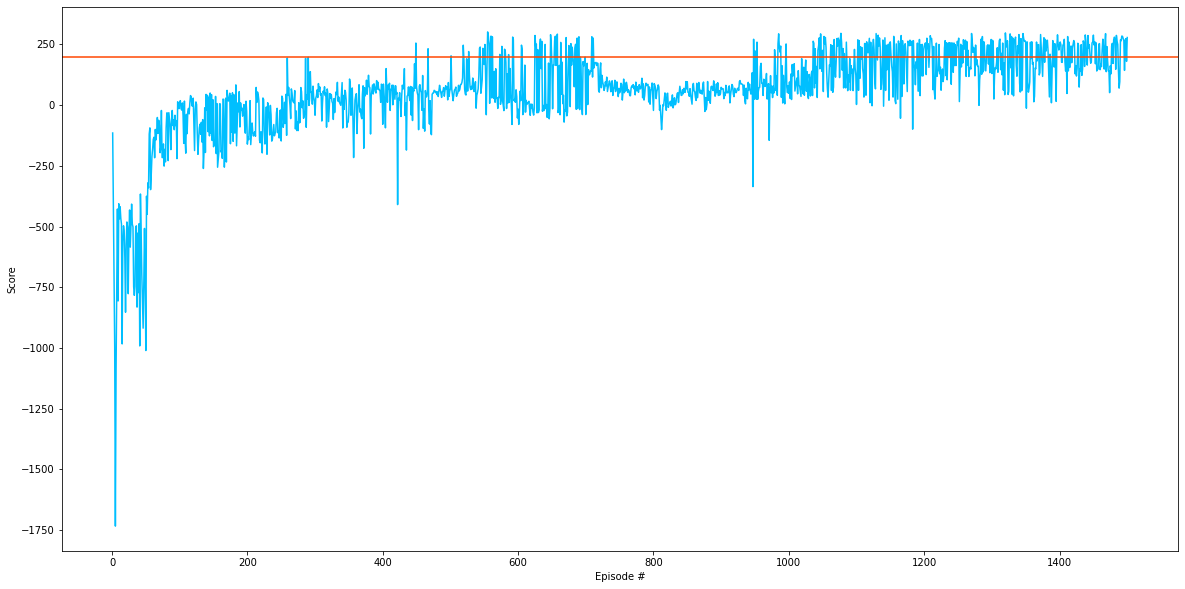

In [10]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, color='deepskyblue')
plt.axhline(y=200, color='orangered')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show();